# Week2

## Signals and Systems

$x(n_1,n_2)$, $-\infty < n_1 , n_2 < \infty$, $n_1,n_2=0,\pm 1, \pm 2$

Orientation axes: $n_1$ is horizontal, $n_2$ is vertical coordinate. $n_1$ goes from $0$ to $N-1$. $m_1$ goes from $0$ to $M-1$. In case of RGB images, we have:

$$
X(n_1*,n_2*) = \begin{bmatrix}
       X_R(n_1*,n_2*)  \\[0.3em]
       X_G(n_1*,n_2*)  \\[0.3em]
       X_B(n_1*,n_2*)           
     \end{bmatrix}
$$

Discrete Unit Impulse is:

$$
\delta (n_1,n_2) =   \begin{cases}
    1       & \quad \text{for } n_1=n_2=0 \\
    0  & \quad \text{ otherwise}\\
  \end{cases}
$$

therefore:

$$
\delta (n_1-n_1',n_2-n_2') =   \begin{cases}
    1       & \quad \text{for } n_1-n_1'=n_2-n_2'=0 \\
    0  & \quad \text{ otherwise}\\
  \end{cases}
$$

Also, there are Separable Signals (also means independent) if:

$$
g(n_1,n_2)=f_1(n_1) \cdot f_2(n_2)
$$

Discrete impulse signal is separable. Another definition is Discrete Unit Step:

$$
u (n_1,n_2) =   \begin{cases}
    1       & \quad \text{for } n_1 \geq 0, n_2 \geq 0 \\
    0  & \quad \text{ otherwise}\\
  \end{cases}
$$

Also $u$ is separable. In fact $u(n_1,n_2)=u(n_1) \cdot u(n_2) $


## Complex Exponential Signals
Very important in DSP. $x(n_1,n_2)=e^{j\omega_1n_1} \cdot e^{j\omega_2n_2} $ . 1. They are Eigen-functions of LSI systems (a system that is linearly and spatial invariant: complex exponential goes through the LSI system). Therefore at the output we could have $Ae^{j\omega_1n_1+j\omega_2n_2}e^{j\Phi}$ 2. They are the building blocks of any signal.

$$
x(n_1,n_2)=e^{j\omega_1n_1} \cdot e^{j\omega_2n_2}=\cos(\omega_1n_1+\omega_2n_2)+j \sin(\omega_1n_1+\omega_2n_2)
$$

The module is 1:

$$
|e^{j\omega_1n_1}| = |e^{j\omega_2n_2}| = 1
$$

They are also periodic signals:

$$
e^{j(\omega_1+2\pi)n_1} e^{j(\omega_2+2\pi)n_2} = e^{j\omega_1n_1} e^{j\omega_2n_2} 
$$

What describes holds for 1d and multidimensional systems. To analyse the periodicity of the signal with respect to $n_1$ and $n_2$, then $N_1$ and $N_2$ have to be:

$$
\omega_1N_1=2\pi k_1 , N_1 = k_1 \frac{2\pi }{\omega_1}
$$

and

$$
\omega_2N_2=2\pi k_2 , N_2 = k_2 \frac{2\pi }{\omega_2}
$$

with $k$ and $N$ integers. In summary, unlike the continuous time complex exponentials, which are always periodic in time or spatial domain (not in frequency), the discrete time complex exponential are always periodic in the frequency domain but may or may not be periodic in the time or spatial domain. 

1D Discrete cosine goes like
$$
cos(\omega n)
$$


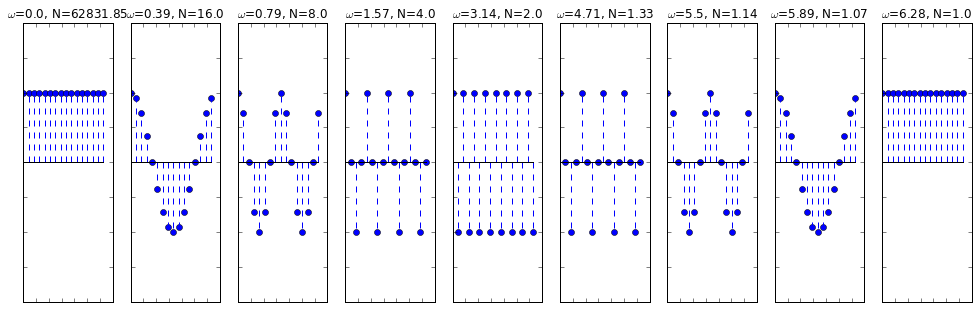

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(17,5))
omega = [0.0001, 1./8*np.pi, 1./4*np.pi, 1./2*np.pi, np.pi, 3./2.*np.pi, 7./4.*np.pi, 15./8.*np.pi, 2*np.pi]
num_steps = 16
x = np.linspace(0, 2*np.pi, num_steps)

for index, alpha in enumerate(omega):
    ax=plt.subplot(1, 9, index+1)
    markerline, stemlines, baseline = plt.stem(x, np.cos(alpha*x*(num_steps-1)/(2*np.pi)), '--')
    plt.setp(stemlines, 'color', 'b')
    plt.setp(baseline, 'color', 'k')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.title('$\omega$='+str(round(alpha,2))+', N='+str(round(2*np.pi/alpha,2)))
    plt.ylim([-2,2])


The 2D Discrete cosine goes like:
$$
cos(\omega_1 n_1 + \omega_2 n_2 )
$$
Also, to remember:
$$
cos(\pi n_1) = (-1)^{n_1}
$$

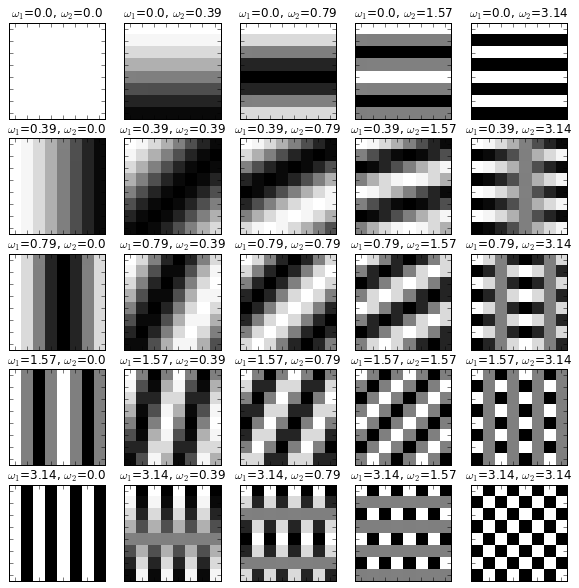

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
omega1 = [0.0001, 1./8*np.pi, 1./4*np.pi, 1./2*np.pi, np.pi]
omega2 = [0.0001, 1./8*np.pi, 1./4*np.pi, 1./2*np.pi, np.pi]
num_steps = 8
x = np.linspace(0, 2*np.pi, num_steps)
y = np.linspace(0, 2*np.pi, num_steps)
X, Y = np.meshgrid(x, y)

i=0
for index1, alpha1 in enumerate(omega1):
    for index2, alpha2 in enumerate(omega2):
        i+=1
        ax=plt.subplot(5, 5, i)
        grid = np.cos((alpha1*X+alpha2*Y)*(num_steps-1)/(2*np.pi))
        ax.imshow(grid, cmap=plt.cm.gray, interpolation='nearest', vmin=-1, vmax=1)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        plt.title('$\omega_1$='+str(round(alpha1,2))+', $\omega_2$='+str(round(alpha2,2)))


## LSI Systems (Linear Shift-Invariant) 

$x(n_1,n_2) \rightarrow T[ \cdot ] \rightarrow y(n_1,n_2)=T[x(n_1,n_2)]$ 
This is a system, which can have indipendent properties as stability, With/out Memory, Causality, $\textbf{Linearity},\textbf{Spatial Invariance}$. $T$ can be an average, median, ... filter. If:

$$
T[\alpha_1 x_1 (n_1,n_2)+\alpha_2 x_2 (n_1,n_2)] = \alpha_1 T[x_1 (n_1,n_2)]+\alpha_2 T[x_2 (n_1,n_2)]
$$

Then $T[\cdot]$ is linear and have for example: $\alpha_2=0 \rightarrow T[\alpha_1 x_1 (n_1,n_2)]=\alpha_1 T [x_1 (n_1,n_2)]$ and $\alpha_1=-\alpha_2 \rightarrow T[0]=0$

An example of a non-linear system is finding the negative of an image:

$$
y(n_1,n_2) = T[x(n_1,n_2)] = 255-x(n_1,n_2)
$$

If I shift the input and find the shift in the output, then the system is Spatially Invariant:

$$
T[x(n_1-k_1,n_2-k_2)]=y(n_1-k_1,n_2-k_2)
$$

Finding the negative of an image is Spatially Invariant (or Spatially Varying).

LSI are Systems that have both fore-mentioned properties.

$$
\delta(n_1,n_2) \rightarrow LSI \rightarrow h(n_1,n_2)=\texttt{impulse respone}
$$

and

$$
x(n_1,n_2) \rightarrow h(n_1,n_2) \rightarrow y(n_1,n_2)=x(n_1,n_2) ** h(n_1,n_2)
$$

The $**$ is 2D Discrete Convolution:

$$
y(n_1,n_2)=x(n_1,n_2)**h(n_1,n_2) = \sum^{\infty}_{k_1=-\infty} \sum^{\infty}_{k_2=-\infty} x(k_1,k_2) \cdot h(n_1-k_1,n_2-k_2)
$$

Convolution is commutative.

## 2D convolution

This is one of the most important operations in signal processing. LSI are uniquely defined by their 2d input. The output is the convolution of the input with the impulse response of the system. The impulse response might have to be identified.

$$
x(n_1,n_2) = \sum^{\infty}_{k_1=-\infty} \sum^{\infty}_{k_2=-\infty} x(k_1,k_2) \delta(n_1-k_1,n_2-k_2)
$$

$$
y(n_1,n_2) = T\left[ x(n_1,n_2)\right] = T \left[ \sum^{\infty}_{k_1=-\infty} \sum^{\infty}_{k_2=-\infty} x(k_1,k_2) \delta(n_1-k_1,n_2-k_2) \right]
$$

with x(k_1,k_2) that acts as a weight, a costant. If I'm working with a linear and spatially invariant system:

$$
y(n_1,n_2) = \sum^{\infty}_{k_1=-\infty} \sum^{\infty}_{k_2=-\infty} x(k_1,k_2) \cdot h(n_1-k_1,n_2-k_2)=x(n_1,n_2)**h(n_1,n_2) 
$$

Convolution is made of Reflection, Shift and Summing.


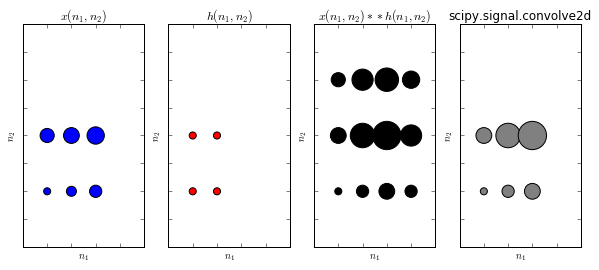

In [3]:
# x(n1,n2)
x1 = [0, 1, 2, 0, 1, 2]
x2 = [0, 0, 0, 1, 1, 1]
x3 = [1, 2, 3, 4, 5, 6]
# h(n1,n2)
h1 = [0, 1, 0, 1]
h2 = [0, 0, 1, 1]
h3 = [1, 1, 1, 1]
# x(n1,n2)**h(n1,n2)
y1 = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
y2 = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
y3 = [1, 3, 5, 3, 5, 12, 16, 9, 4, 9, 11, 6]

from scipy import signal
import numpy as np
yy = signal.convolve2d(np.reshape(x3,(2,3)), np.reshape(h3,(2,2)), mode='same')

plt.figure(figsize=(10,4))
ax=plt.subplot(1, 4, 1)
ax.scatter(x1,x2, c='b',s=[x*50 for x in x3] )
plt.setp(ax.get_xticklabels(), visible=False); plt.setp(ax.get_yticklabels(), visible=False)
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-1,4]); plt.ylim([-1,3]);
plt.title('$x(n_1,n_2)$')
ax=plt.subplot(1, 4, 2)
ax.scatter(h1,h2, c='r',s=[x*50 for x in h3] )
plt.setp(ax.get_xticklabels(), visible=False); plt.setp(ax.get_yticklabels(), visible=False)
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-1,4]); plt.ylim([-1,3]);
plt.title('$h(n_1,n_2)$')
ax=plt.subplot(1, 4, 3)
ax.scatter(y1,y2, c='k',s=[x*50 for x in y3] )
plt.setp(ax.get_xticklabels(), visible=False); plt.setp(ax.get_yticklabels(), visible=False)
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-1,4]); plt.ylim([-1,3]);
plt.title('$x(n_1,n_2)**h(n_1,n_2)$')
ax=plt.subplot(1, 4, 4)
ax.scatter(x1,x2, c='grey',s=[x*50 for x in yy] )
plt.setp(ax.get_xticklabels(), visible=False); plt.setp(ax.get_yticklabels(), visible=False)
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-1,4]); plt.ylim([-1,3]);
plt.title("scipy.signal.convolve2d")


## Filtering in the Spatial Domain

We are studying $\bf{Boundary Effects}$. We could get for example zero-padding, symmetric, circular filter. Also, we can apply $\bf{Spatial Filtering}$, like LPF (Low pass filter) which generates a blurry image.. or HPF (High pass filter), which accentuates the edges of the image. LPF is also used for $\bf{Noise Reduction}$. Median Filtering helps a lot for Noise Reduction noise.